In [2]:
import pykat
from pykat import finesse
from pykat.commands import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rc('font', size= 20)
plt.rc('axes', titlesize= 20)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
#pykat.init_pykat_plotting(dpi=50)

In [59]:
# ============ Triangular Cavity ================
d = 0.30
R = 37.8
L = 10.05
l0 = np.sqrt(d**2 + L**2)
phi = 90/2 #89.14490260373327/2

tri = finesse.kat()
tri.parse(
f'''
l l0 1 0 n0
s s0 0 n0 nMC1in
bs MC1 0.9999999999999999 0.0000000000000001 0 {phi} nMC1in nMC1refl nMC1trans nMC1ret
s sMC1toMC3 {d} nMC1trans nMC3in
bs MC3 1 0 0 {phi} nMC3in nMC3refl nMC3trans nMC3ret
s sMC3toMC2 {l0} nMC3refl nMC2in
bs MC2 1 0 0 1 nMC2in nMC2refl nMC2trans dump
s sMC2toMC1 {l0} nMC2refl nMC1ret
attr MC2 Rc {R}
cav TMC MC2 nMC2refl MC2 nMC2in
'''
)

tri.maxtem = 1
tri.trace = 2

tri_dec = tri.deepcopy()
tri_dec.noxaxis = True
tri_dec.parse(
'''
ad a00_1i 0 0 0 nMC1trans
ad a10_1i 1 0 0 nMC1trans
ad a01_1i 0 1 0 nMC1trans

ad a00_1r 0 0 0 nMC1ret*
ad a10_1r 1 0 0 nMC1ret*
ad a01_1r 0 1 0 nMC1ret*

ad a00_2i 0 0 0 nMC2in*
ad a10_2i 1 0 0 nMC2in*
ad a01_2i 0 1 0 nMC2in*

ad a00_2r 0 0 0 nMC2refl
ad a10_2r 1 0 0 nMC2refl
ad a01_2r 0 1 0 nMC2refl

ad a00_3i 0 0 0 nMC3in*
ad a10_3i 1 0 0 nMC3in*
ad a01_3i 0 1 0 nMC3in*

ad a00_3r 0 0 0 nMC3refl
ad a10_3r 1 0 0 nMC3refl
ad a01_3r 0 1 0 nMC3refl

bp w1x x w nMC1trans
bp w2x x w nMC2in
bp w3x x w nMC3in
'''
)

#out2 = tri_dec.run()
#print(out2.stdout)

<p><h2>Differential yaw of the flats: &#945<sub>-<\sub> <\h2><\p>

In [60]:
alphaminus = tri_dec.deepcopy()

alphaminus.parse(
''' 
xaxis MC1 xbeta lin -1u 1u 100
put MC3 xbeta $mx1

yaxis re:im
'''
)

alphaminus_out = alphaminus.run()

--------------------------------------------------------------
Running kat - Started at 2020-04-08 15:01:46.370790
Used Finesse 2.2 at /Users/mauriciodiaz-ortizjr./anaconda3/pkgs/finesse-2.2-h4005e35_11/bin/kat

Finished in 0.0531812 seconds


100% | ETA:  0:00:00 | Saving data                                             

In [61]:
del_x = -np.sqrt(L**2 + d**2)*2*alphaminus_out.x

a00_1i = alphaminus_out['a00_1i']
a10_1i = alphaminus_out['a10_1i']
a01_1i = alphaminus_out['a01_1i']

a00_1r = alphaminus_out['a00_1r']
a10_1r = alphaminus_out['a10_1r']
a01_1r = alphaminus_out['a01_1r']

a00_2i = alphaminus_out['a00_2i']
a10_2i = alphaminus_out['a10_2i']
a01_2i = alphaminus_out['a01_2i']

a00_2r = alphaminus_out['a00_2r']
a10_2r = alphaminus_out['a10_2r']
a01_2r = alphaminus_out['a01_2r']

a00_3i = alphaminus_out['a00_3i']
a10_3i = alphaminus_out['a10_3i']
a01_3i = alphaminus_out['a01_3i']

a00_3r = alphaminus_out['a00_3r']
a10_3r = alphaminus_out['a10_3r']
a01_3r = alphaminus_out['a01_3r']

w1x = alphaminus_out['w1x'].real
w2x = alphaminus_out['w2x'].real
w3x = alphaminus_out['w3x'].real

delx_1 = w1x*a10_1i.real/np.abs(a00_1i)
delx_3 = w3x*a10_3i.real/np.abs(a00_3i)

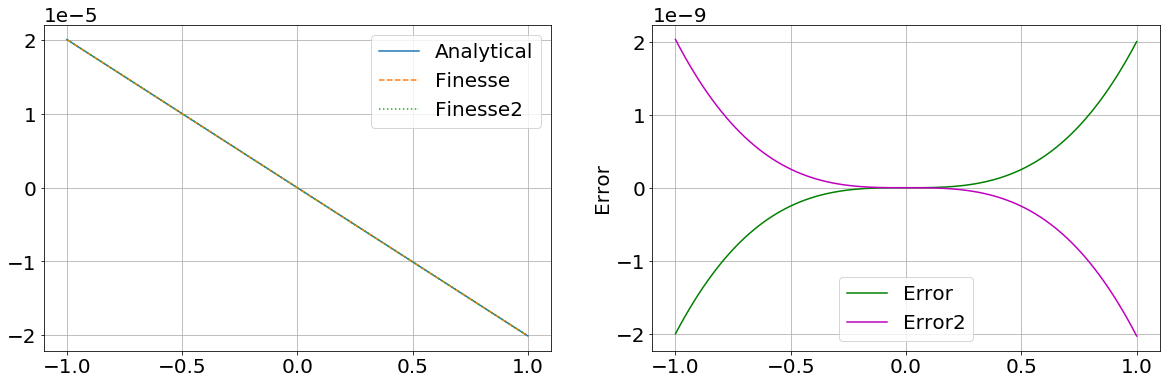

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(1e6*alphaminus_out.x, del_x, label="Analytical")
ax1.plot(1e6*alphaminus_out.x, delx_1, '--', label="Finesse")
ax1.plot(1e6*alphaminus_out.x, delx_3, ':', label="Finesse2")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.plot(1e6*alphaminus_out.x, (delx_1-del_x), 'g', label="Error")
ax2.plot(1e6*alphaminus_out.x, -(delx_3-del_x), 'm', label="Error2")
#plt.tick_params(axis='y', colors='g')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Error')
#ax.tick_params(axis='y', colors='m')

ax1.grid(True, which='both')
ax2.grid(True, which='both')
ax1.legend()
ax2.legend()

This should result in a the base of the triangle in the cavity moving up.

<h2> Yaw of the curved mirror: &#945<sub>b<\sub> <\h2>

In [63]:
alphab = tri_dec.deepcopy()

alphab.parse(
''' 
xaxis MC2 xbeta lin -1u 1u 100
yaxis re:im
'''
)

alphab_out = alphab.run()

--------------------------------------------------------------
Running kat - Started at 2020-04-08 15:01:52.682931
Used Finesse 2.2 at /Users/mauriciodiaz-ortizjr./anaconda3/pkgs/finesse-2.2-h4005e35_11/bin/kat

Finished in 0.0331681 seconds


100% | ETA:  0:00:00 | Saving data                                             

In [64]:
theta = R*alphab_out.x/(R-L-(d/2))
l = (d/2)/np.cos(theta)
del_xa = (d/2)*np.tan(theta)#l*np.sin(theta) # = -del_xc = = -del_ya = -del_yc =
del_yb = -(L+d/2)*theta

a00_1i = alphab_out['a00_1i']
a10_1i = alphab_out['a10_1i']
a01_1i = alphab_out['a01_1i']

a00_1r = alphab_out['a00_1r']
a10_1r = alphab_out['a10_1r']
a01_1r = alphab_out['a01_1r']

a00_2i = alphab_out['a00_2i']
a10_2i = alphab_out['a10_2i']
a01_2i = alphab_out['a01_2i']

a00_2r = alphab_out['a00_2r']
a10_2r = alphab_out['a10_2r']
a01_2r = alphab_out['a01_2r']

a00_3i = alphab_out['a00_3i']
a10_3i = alphab_out['a10_3i']
a01_3i = alphab_out['a01_3i']

a00_3r = alphab_out['a00_3r']
a10_3r = alphab_out['a10_3r']
a01_3r = alphab_out['a01_3r']

w1x = alphab_out['w1x'].real
w2x = alphab_out['w2x'].real
w3x = alphab_out['w3x'].real

delx_1 = w1x*a10_1i.real/np.abs(a00_1i)
delx_2 = w2x*a10_2i.real/np.abs(a00_2i)
delx_3 = w3x*a10_3i.real/np.abs(a00_3i)

<h3> &#945<sub>b<\sub>: Beam spot motion on the flats <\h3>

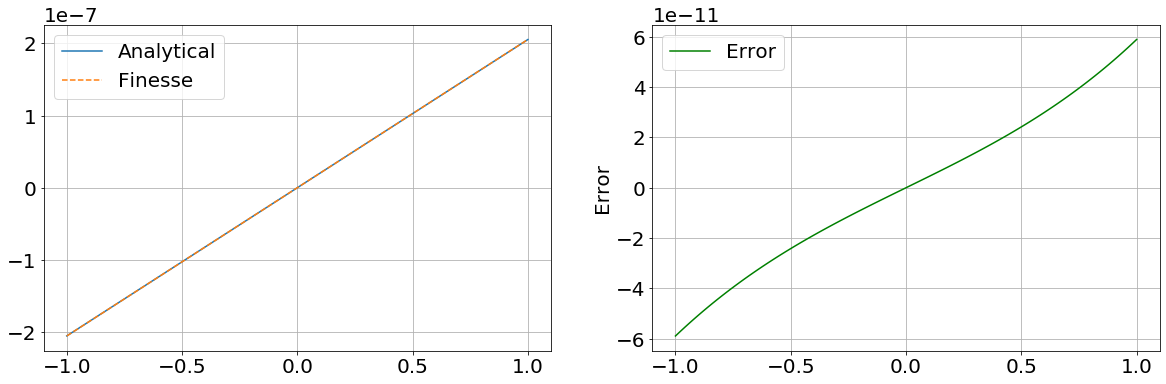

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(alphab_out.x*1e6, del_xa, label="Analytical")
ax1.plot(alphab_out.x*1e6, delx_1, '--', label="Finesse") # can multiply by .02 to get them to match
#ax1.plot(*alphab_out.x, delx_3, ':', label="Finesse2")
#ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.plot(alphab_out.x*1e6, -(del_xa-delx_1), 'g', label="Error")
#ax2.plot(*alphaminus_out.x, -(delx_3-del_x), 'm', label="Error2")
#plt.tick_params(axis='y', colors='g')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Error')
#ax.tick_params(axis='y', colors='m')

ax1.grid(True, which='both')
ax2.grid(True, which='both')
ax1.legend()
ax2.legend()

<h3> &#945<sub>b<\sub>: Beam spot motion on the curved mirror <\h3>

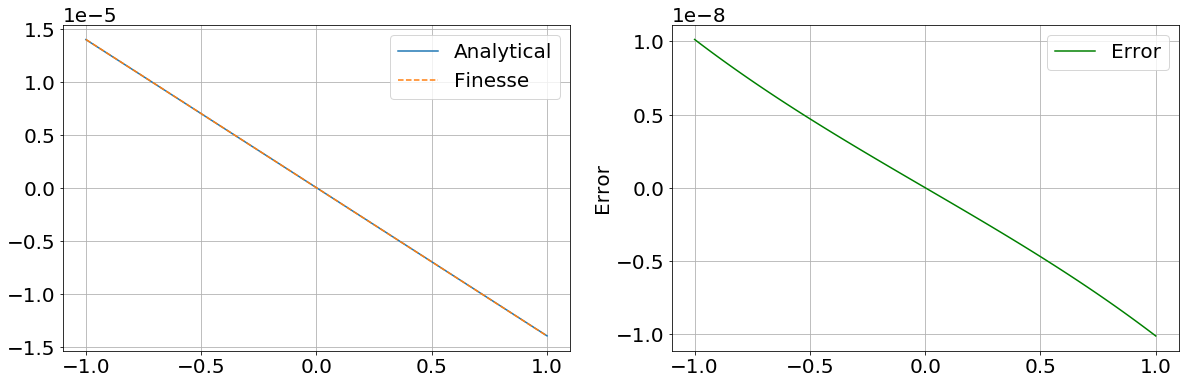

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(1e6*alphab_out.x, del_yb, label="Analytical")
ax1.plot(1e6*alphab_out.x, -delx_2, '--', label="Finesse") 
#ax1.plot(*alphab_out.x, delx_3, ':', label="Finesse2")
#ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.plot(1e6*alphab_out.x, -(del_yb+delx_2), 'g', label="Error")
#ax2.plot(*alphaminus_out.x, -(delx_3-del_x), 'm', label="Error2")
#plt.tick_params(axis='y', colors='g')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Error')
#ax.tick_params(axis='y', colors='m')

ax1.grid(True, which='both')
ax2.grid(True, which='both')
ax1.legend()
ax2.legend()

<h2> Common yaw of flat mirrors: &#945<sub>+<\sub> <\h2>

In [67]:
alphaplus = tri_dec.deepcopy()

alphaplus.parse(
''' 
xaxis MC1 xbeta lin -1u 1u 100
put MC3 xbeta $x1

yaxis re:im
'''
)

alphaplus_out = alphab.run()

--------------------------------------------------------------
Running kat - Started at 2020-04-08 15:01:54.563572
Used Finesse 2.2 at /Users/mauriciodiaz-ortizjr./anaconda3/pkgs/finesse-2.2-h4005e35_11/bin/kat

Finished in 0.0387919 seconds


100% | ETA:  0:00:00 | Saving data                                             

In [68]:
l_a = (d/2)*(1+2*alphaplus_out.x)
l_c = (d/2)*(1-2*alphaplus_out.x)
theta = ((R-L)/(R-L-(d/2)))*2*alphaplus_out.x
del_xa = -(d/2)*theta
del_xc = (d/2)*theta
del_yb = ((d/2)*R/(R-L-(d/2)))*2*alphaplus_out.x

a00_1i = alphaplus_out['a00_1i']
a10_1i = alphaplus_out['a10_1i']
a01_1i = alphaplus_out['a01_1i']

a00_1r = alphaplus_out['a00_1r']
a10_1r = alphaplus_out['a10_1r']
a01_1r = alphaplus_out['a01_1r']

a00_2i = alphaplus_out['a00_2i']
a10_2i = alphaplus_out['a10_2i']
a01_2i = alphaplus_out['a01_2i']

a00_2r = alphaplus_out['a00_2r']
a10_2r = alphaplus_out['a10_2r']
a01_2r = alphaplus_out['a01_2r']

a00_3i = alphaplus_out['a00_3i']
a10_3i = alphaplus_out['a10_3i']
a01_3i = alphaplus_out['a01_3i']

a00_3r = alphaplus_out['a00_3r']
a10_3r = alphaplus_out['a10_3r']
a01_3r = alphaplus_out['a01_3r']

w1x = alphaplus_out['w1x'].real
w2x = alphaplus_out['w2x'].real
w3x = alphaplus_out['w3x'].real

delx_1 = w1x*a10_1i.real/np.abs(a00_1i)
delx_2 = w2x*a10_2i.real/np.abs(a00_2i)
delx_3 = w3x*a10_3i.real/np.abs(a00_3i)

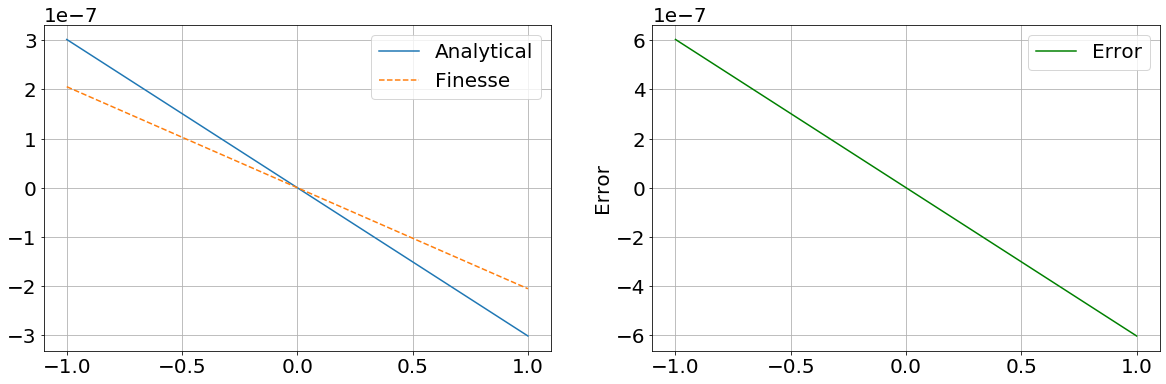

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(alphaplus_out.x*1e6, del_xa, label="Analytical")
ax1.plot(alphaplus_out.x*1e6, -delx_1, '--', label="Finesse") # can multiply by .02 to get them to match
#ax1.plot(*alphab_out.x, delx_3, ':', label="Finesse2")
#ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.plot(alphaplus_out.x*1e6, (del_xa-delx_1*np.sqrt(2.15)), 'g', label="Error")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Error')
#ax.tick_params(axis='y', colors='m')

ax1.grid(True, which='both')
ax2.grid(True, which='both')
ax1.legend()
ax2.legend()

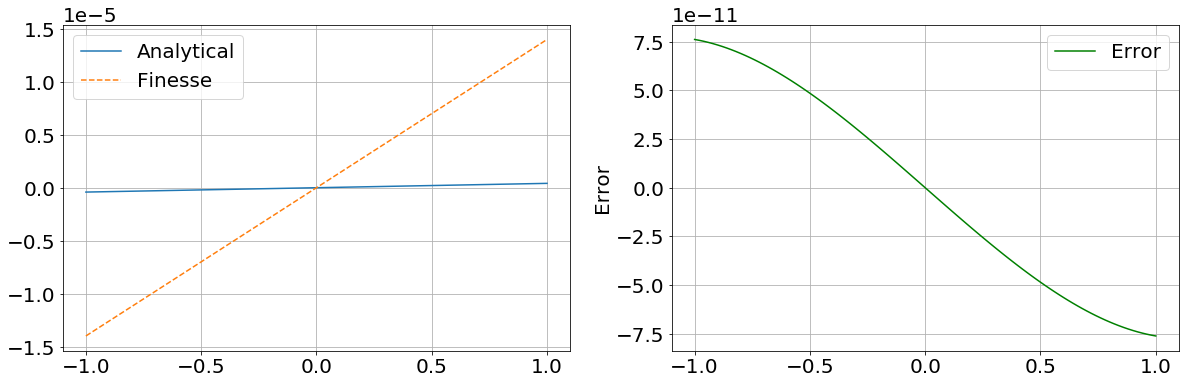

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(alphaplus_out.x*1e6, del_yb, label="Analytical")
ax1.plot(alphaplus_out.x*1e6, delx_2, '--', label="Finesse") # can multiply by .02 to get them to match
#ax1.plot(*alphab_out.x, delx_3, ':', label="Finesse2")
#ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.plot(alphaplus_out.x*1e6, (delx_2*.029385-del_yb), 'g', label="Error")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Error')
#ax.tick_params(axis='y', colors='m')

ax1.grid(True, which='both')
ax2.grid(True, which='both')
ax1.legend()
ax2.legend()